In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
cross_train = pd.read_csv('train_data.csv')
cross_test = pd.read_csv('test_data.csv')

In [43]:
cross_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [44]:
cross_train.shape

(300000, 12)

**Data Information and Description :**

In [45]:
cross_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Driving_License       300000 non-null  int64  
 4   Region_Code           300000 non-null  float64
 5   Previously_Insured    300000 non-null  int64  
 6   Vehicle_Age           300000 non-null  object 
 7   Vehicle_Damage        300000 non-null  object 
 8   Annual_Premium        300000 non-null  float64
 9   Policy_Sales_Channel  300000 non-null  float64
 10  Vintage               300000 non-null  int64  
 11  Response              300000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.5+ MB


In [46]:
cross_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [47]:
cross_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,150000.500000,38.815840,0.997863,26.382180,0.457947,30534.312123,112.118003,154.323843,0.122937
std,86602.684716,15.495699,0.046175,13.232431,0.498229,17247.475889,54.141651,83.643687,0.328365
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,75000.750000,25.000000,1.000000,15.000000,0.000000,24388.000000,29.000000,82.000000,0.000000
50%,150000.500000,36.000000,1.000000,28.000000,0.000000,31642.000000,133.000000,154.000000,0.000000
75%,225000.250000,49.000000,1.000000,35.000000,1.000000,39360.250000,152.000000,227.000000,0.000000
max,300000.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Handling missing values :**

In [48]:
cross_train.skew()

C:\Users\sidde\AppData\Local\Temp\ipykernel_8044\1053106904.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cross_train.skew()


id                       0.000000
Age                      0.673394
Driving_License        -21.564450
Region_Code             -0.114944
Previously_Insured       0.168812
Annual_Premium           1.857179
Policy_Sales_Channel    -0.903822
Vintage                  0.003963
Response                 2.296626
dtype: float64

In [49]:
#Dropping Driving_License Column
data_train = cross_train

data_train.drop('Driving_License', axis = 1, inplace = True)

In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  object 
 2   Age                   300000 non-null  int64  
 3   Region_Code           300000 non-null  float64
 4   Previously_Insured    300000 non-null  int64  
 5   Vehicle_Age           300000 non-null  object 
 6   Vehicle_Damage        300000 non-null  object 
 7   Annual_Premium        300000 non-null  float64
 8   Policy_Sales_Channel  300000 non-null  float64
 9   Vintage               300000 non-null  int64  
 10  Response              300000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 25.2+ MB


In [51]:
data_train.isna().sum()

id                      0
Gender                  0
Age                     0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# EDA :

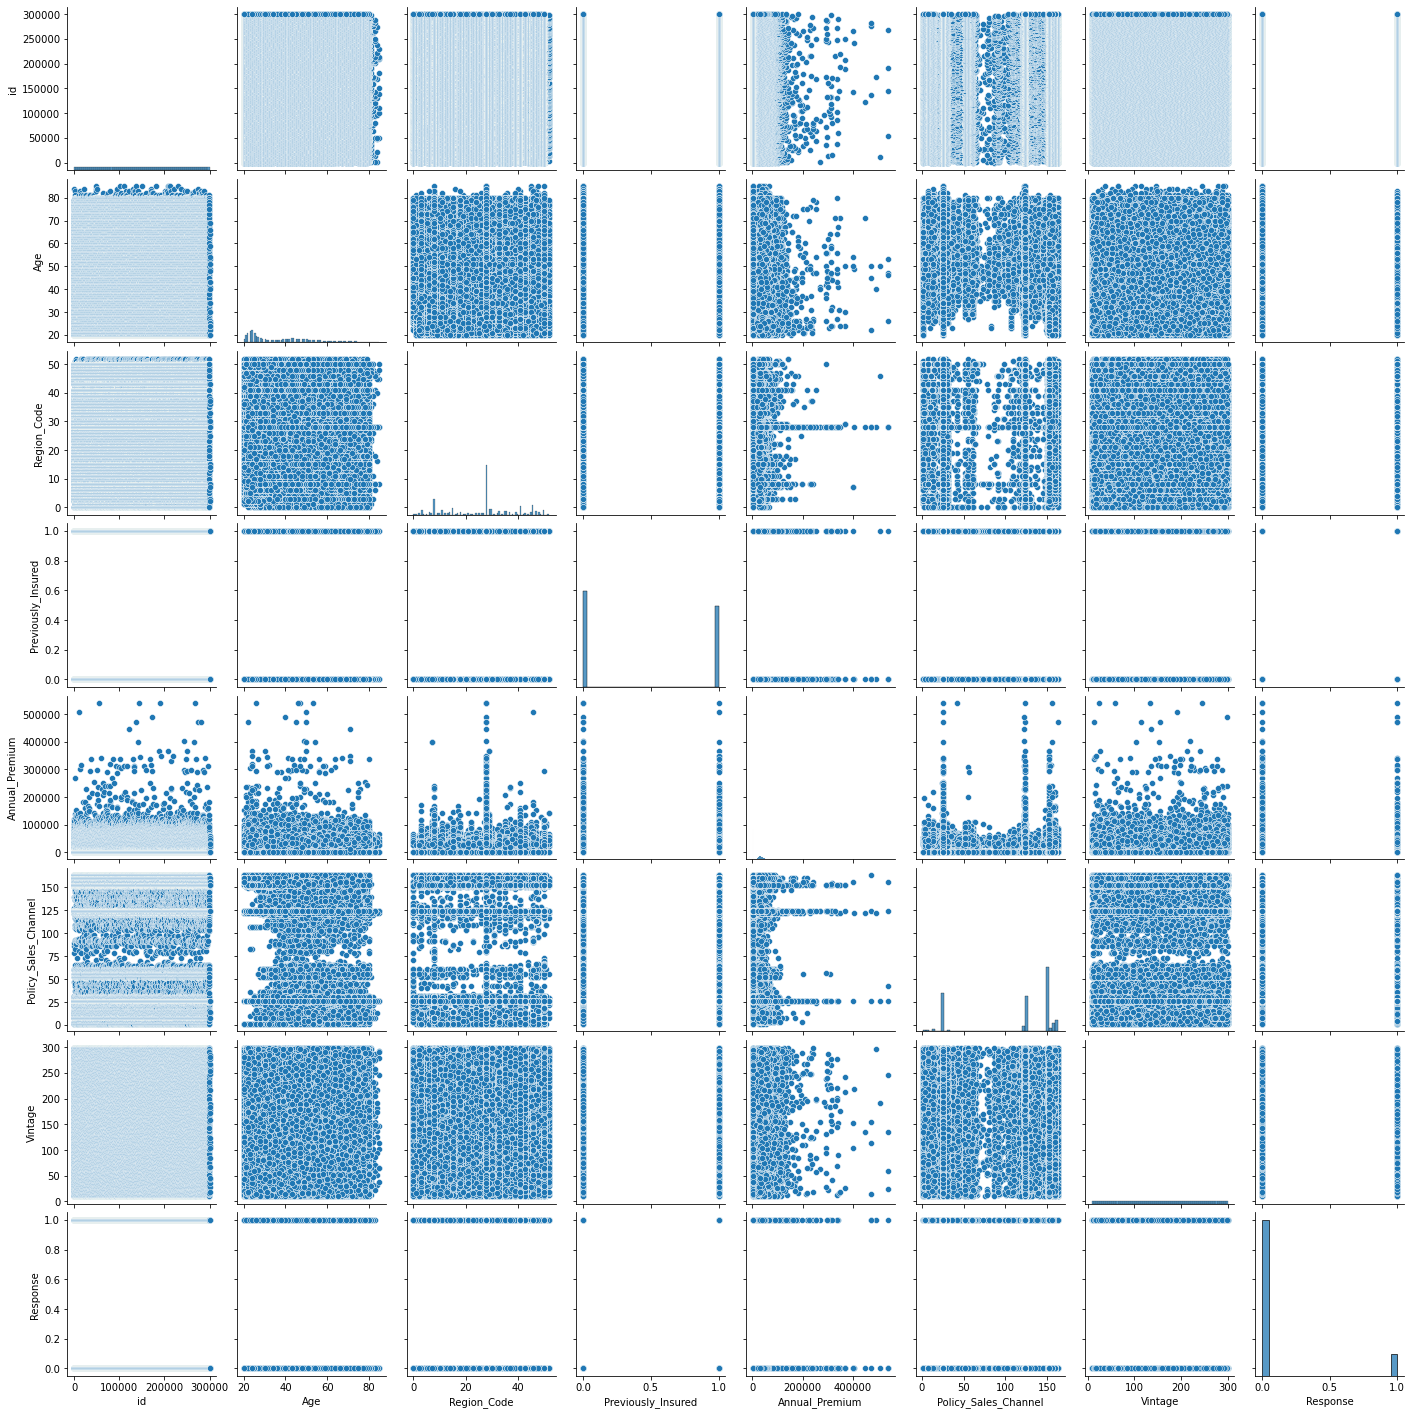

In [52]:
sns.pairplot(data_train)

In [53]:
data_train.corr()

,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001351,-0.001590,0.002779,0.001183,-0.000872,-0.001208,0.000681
Age,0.001351,1.000000,0.042627,-0.254640,0.066565,-0.576893,0.000817,0.110922
Region_Code,-0.001590,0.042627,1.000000,-0.024411,-0.010025,-0.042550,-0.002597,0.009845
Previously_Insured,0.002779,-0.254640,-0.024411,1.000000,0.005007,0.219195,0.000624,-0.341534
Annual_Premium,0.001183,0.066565,-0.010025,0.005007,1.000000,-0.112268,0.000890,0.023209
Policy_Sales_Channel,-0.000872,-0.576893,-0.042550,0.219195,-0.112268,1.000000,-0.002438,-0.140574
Vintage,-0.001208,0.000817,-0.002597,0.000624,0.000890,-0.002438,1.000000,-0.000913
Response,0.000681,0.110922,0.009845,-0.341534,0.023209,-0.140574,-0.000913,1.000000


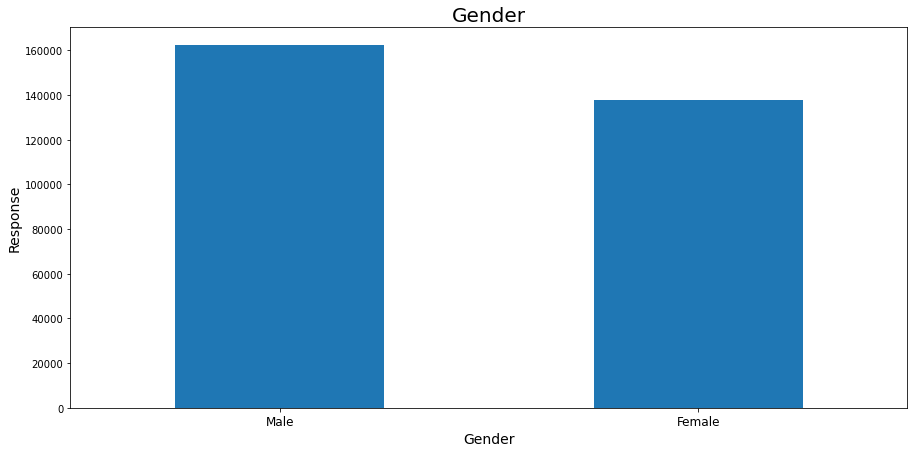

In [54]:
figure = plt.figure(figsize=[15, 7])
data_train['Gender'].value_counts().plot.bar()
plt.xticks(rotation= 0 , size=12)
plt.xlabel(xlabel='Gender', size=14)
plt.ylabel(ylabel='Response', size=14)
plt.title(label='Gender', size=20)
plt.show()

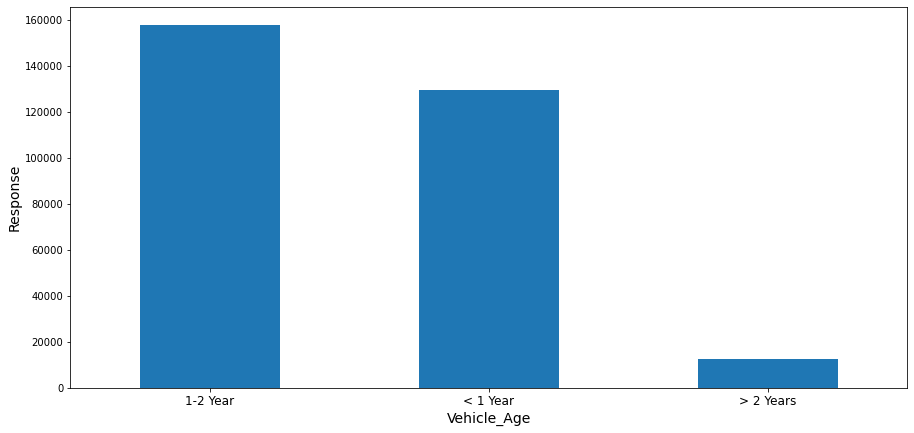

In [55]:
figure = plt.figure(figsize=[15, 7])
data_train['Vehicle_Age'].value_counts().plot.bar()
plt.xticks(rotation= 0 , size=12)
plt.xlabel(xlabel='Vehicle_Age', size=14)
plt.ylabel(ylabel='Response', size=14)
plt.show()

**Data Cleaning :**

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [58]:
data_train['Gender'] = le.fit_transform(data_train['Gender'])
data_train['Vehicle_Age'] = le.fit_transform(data_train['Vehicle_Age'])

In [59]:
Vehicle_Damage_val={'Yes':0,'No':1}
data_train['Vehicle_Damage']=data_train['Vehicle_Damage'].map(Vehicle_Damage_val)

In [60]:
data_train.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,28.0,0,2,0,40454.0,26.0,217,1
1,2,1,76,3.0,0,0,1,33536.0,26.0,183,0
2,3,1,47,28.0,0,2,0,38294.0,26.0,27,1
3,4,1,21,11.0,1,1,1,28619.0,152.0,203,0
4,5,0,29,41.0,1,1,1,27496.0,152.0,39,0


In [61]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Gender                300000 non-null  int64  
 2   Age                   300000 non-null  int64  
 3   Region_Code           300000 non-null  float64
 4   Previously_Insured    300000 non-null  int64  
 5   Vehicle_Age           300000 non-null  int64  
 6   Vehicle_Damage        300000 non-null  int64  
 7   Annual_Premium        300000 non-null  float64
 8   Policy_Sales_Channel  300000 non-null  float64
 9   Vintage               300000 non-null  int64  
 10  Response              300000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 25.2 MB


**Train Test Split :**

In [62]:
data_train.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,28.0,0,2,0,40454.0,26.0,217,1
1,2,1,76,3.0,0,0,1,33536.0,26.0,183,0
2,3,1,47,28.0,0,2,0,38294.0,26.0,27,1
3,4,1,21,11.0,1,1,1,28619.0,152.0,203,0
4,5,0,29,41.0,1,1,1,27496.0,152.0,39,0


In [63]:
x = data_train.iloc[:,1:10]
y = data_train['Response']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240000, 9)
(60000, 9)
(240000,)
(60000,)


# Model Building :

**Logistic Regression :**

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()

In [70]:
lr.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
#Predicting on train data
y_pred_train = lr.predict(x_train)

In [72]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
#Predicting on test data
y_pred_test = lr.predict(x_test)

In [74]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Checking Accuracy Score, Confusion Matrix and Classification Report:**

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [79]:
#Checking on train
modelEval(y_train, y_pred_train)

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[210598      0]
 [ 29402      0]]
The accuracy of the Model is : 0.8774916666666667
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    210598
           1       0.00      0.00      0.00     29402

    accuracy                           0.88    240000
   macro avg       0.44      0.50      0.47    240000
weighted avg       0.77      0.88      0.82    240000



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
#Checking on test
modelEval(y_test, y_pred_test)

[[52521     0]
 [ 7479     0]]
The accuracy of the Model is : 0.87535
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     52521
           1       0.00      0.00      0.00      7479

    accuracy                           0.88     60000
   macro avg       0.44      0.50      0.47     60000
weighted avg       0.77      0.88      0.82     60000



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
cross_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,300001,Male,67,1,8.0,1,1-2 Year,No,34821.0,26.0,35
1,300002,Male,33,1,18.0,1,< 1 Year,No,2630.0,152.0,88
2,300003,Male,27,1,28.0,1,< 1 Year,No,41244.0,152.0,226
3,300004,Male,75,1,8.0,0,1-2 Year,Yes,41078.0,7.0,202
4,300005,Male,41,1,31.0,0,1-2 Year,Yes,2630.0,124.0,17


In [113]:
cross_test['Gender'] = le.fit_transform(cross_test['Gender'])
cross_test['Vehicle_Age'] = le.fit_transform(cross_test['Vehicle_Age'])

In [114]:
Vehicle_Damage_test={'Yes':0,'No':1}
cross_test['Vehicle_Damage']=cross_test['Vehicle_Damage'].map(Vehicle_Damage_test)

In [116]:
cross_test.drop('Driving_License', axis = 1, inplace = True)

In [117]:
cross_test.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,300001,1,67,8.0,1,0,1,34821.0,26.0,35
1,300002,1,33,18.0,1,1,1,2630.0,152.0,88
2,300003,1,27,28.0,1,1,1,41244.0,152.0,226
3,300004,1,75,8.0,0,0,0,41078.0,7.0,202
4,300005,1,41,31.0,0,0,0,2630.0,124.0,17


In [118]:
test_1 = cross_test.iloc[:, 1:]

In [119]:
predicted_test = lr.predict(test_1)

In [120]:
predicted_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
cross_test['Response_Status'] = predicted_test

In [122]:
cross_test.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response_Status
0,300001,1,67,8.0,1,0,1,34821.0,26.0,35,0
1,300002,1,33,18.0,1,1,1,2630.0,152.0,88,0
2,300003,1,27,28.0,1,1,1,41244.0,152.0,226,0
3,300004,1,75,8.0,0,0,0,41078.0,7.0,202,0
4,300005,1,41,31.0,0,0,0,2630.0,124.0,17,0


In [123]:
cross_test.to_csv('Submission_cross_test.csv', index = False, header = False)